In [21]:
import pandas as pd
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np

In [25]:
files = ['rf.csv', 'rf_lasso.csv', 'rf_5degraders.csv', 'rf_5degraders_amuc_buni.csv', 'rf_5best_fregress.csv', 'rf_baci_umur_amuc_buni.csv']
labels = ['RF_alone','RF+LASSO','RF+5DEG','RF+7SUB','RF+5BEST','RF+4KEY']
lines = []
for f,l in zip(files,labels):
    df = pd.read_csv(f, index_col=0)
    df_intra = df[(df.PerturbationType == 'intrapolation') & (df.SCFA=='Propionate') & (df.PredictionType=='test')]
    r2_intra = r2_score(y_true=df_intra.ObservedValue, y_pred=df_intra.PredictedValue)
    df_extra = df[(df.PerturbationType == 'extrapolation') & (df.SCFA=='Propionate') & (df.PredictionType=='test')]
    r2_extra = r2_score(y_true=df_extra.ObservedValue, y_pred=df_extra.PredictedValue)
    lines.append([l, r2_intra, r2_extra])
    
df_res = pd.DataFrame(lines, columns = ['Method','R2_intra','R2_extra']).sort_values('R2_intra', ascending=False)
df_res

,Method,R2_intra,R2_extra
2,RF+5DEG,0.428976,-0.203406
3,RF+7SUB,0.353963,-0.368765
0,RF_alone,0.350431,-0.755109
1,RF+LASSO,0.294888,-0.453784
5,RF+4KEY,0.291569,-0.357336
4,RF+5BEST,0.287492,-0.538491


Text(0.5, 0, 'R2')

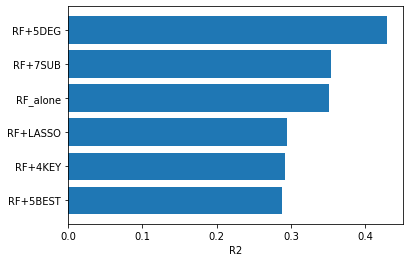

In [26]:
fig, ax = plt.subplots()

labels = list(df_res.Method)
y_pos = np.arange(len(df_res))
x_pos = df_res.R2_intra

ax.barh(y_pos, x_pos, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('R2')